# Item based recommender
Item-based collaborative filtering, pioneered by Amazon, is generally regarded as a faster and more reliable approach compared to user-based filtering, particularly when there are more users than items in the system. The reason behind this is that the average rating received by an item tends to be more stable over time, in contrast to the average rating given by a user to various items, which can change frequently. Another advantage of item-based filtering is its superior performance in situations where the ratings matrix contains many missing values, commonly referred to as a "sparse" matrix.

---
##1.&nbsp;Import libraries and files 💾
We'll be using the same book ratings csv as in the Popularity recommender notebook.

In [1]:
import pandas as pd

In [2]:
url = 'https://drive.google.com/file/d/1yFwxNVF0MuAsiFTAZMfoVGt1nIOatByg/view?usp=sharing'
path = 'https://drive.google.com/uc?id='+url.split('/')[-2]
df = pd.read_csv(path)

---
##2.&nbsp;Refresh our memories of how the data looks 🍵

In [3]:
df.head()

,user_id,user_location,user_age,book_isbn,book_rating,book_title,book_author,book_year_of_publication,book_publisher,img_s,img_m,img_l,book_summary,book_language,book_category,publisher_city,publisher_state,publisher_country
0,3329,"grantsville, utah, usa",34.7439,0440234743,8,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,"A suicidal billionaire, a burnt-out Washington...",en,['Fiction'],grantsville,utah,usa
1,7346,"sunnyvale, california, usa",49.0000,0440234743,9,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,"A suicidal billionaire, a burnt-out Washington...",en,['Fiction'],sunnyvale,california,usa
2,7352,"houston, texas, usa",53.0000,0440234743,8,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,"A suicidal billionaire, a burnt-out Washington...",en,['Fiction'],houston,texas,usa
3,9419,"somewhere, texas, usa",34.7439,0440234743,5,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,"A suicidal billionaire, a burnt-out Washington...",en,['Fiction'],somewhere,texas,usa
4,11224,"tumwater, washington, usa",51.0000,0440234743,6,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,"A suicidal billionaire, a burnt-out Washington...",en,['Fiction'],tumwater,washington,usa


---
##3.&nbsp;User-Item matrix 💻
In order to construct an item-based memory-based recommender system, the initial stage involves creating a user-item matrix. This matrix serves as a fundamental component for storing and examining the interactions between users and items, enabling us to uncover similarities and make predictions. The user-item matrix acts as a representation of the ratings or preferences expressed by users for each item within the system.

In [4]:
user_book_matrix = pd.pivot_table(data=df,
                                  values='book_rating',
                                  index='user_id',
                                  columns='book_isbn',
                                  fill_value=0)
user_book_matrix.head(10)

book_isbn,002542730X,0060096195,006016848X,0060173289,0060175400,0060199652,0060391626,0060392452,0060502258,0060915544,...,1558745157,1559029838,1573225517,1573225789,1573227331,1573229326,1573229571,1592400876,1844262553,1878424319
user_id,,,,,,,,,,,,,,,,,,,,,
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###3.1.&nbsp;Pearson correlation matrix
The Pearson correlation coefficient (PCC) measures the linear relationship between two sets of data. It takes values between -1 and 1, where -1 indicates a perfect negative correlation, 1 represents a perfect positive correlation, and 0 signifies no correlation at all.

In pandas, the `.corr()` method is employed to calculate the pairwise correlation among columns in a DataFrame, excluding any NaN (missing) values. This method generates a correlation matrix.

In [5]:
book_correlations_matrix = user_book_matrix.corr()
book_correlations_matrix

book_isbn,002542730X,0060096195,006016848X,0060173289,0060175400,0060199652,0060391626,0060392452,0060502258,0060915544,...,1558745157,1559029838,1573225517,1573225789,1573227331,1573229326,1573229571,1592400876,1844262553,1878424319
book_isbn,,,,,,,,,,,,,,,,,,,,,
002542730X,1.000000,-0.003036,0.011179,-0.003143,0.021341,0.009955,0.008030,0.020648,0.008914,0.023905,...,0.020252,0.010030,0.026520,0.026523,0.036262,0.034189,0.023315,0.023157,0.008205,-0.003164
0060096195,-0.003036,1.000000,-0.002595,-0.002642,0.012907,-0.002700,-0.003009,0.017811,-0.004461,0.009166,...,-0.002911,0.038259,-0.002522,0.007883,-0.002563,-0.003513,-0.002590,0.024784,-0.002478,-0.002659
006016848X,0.011179,-0.002595,1.000000,-0.002686,0.018981,0.022871,0.032078,0.018636,0.038503,-0.003863,...,0.031511,0.022813,-0.002564,0.017301,0.012102,0.013105,0.044135,0.020729,0.019179,0.031086
0060173289,-0.003143,-0.002642,-0.002686,1.000000,0.052617,0.057267,-0.003115,0.019489,0.023312,-0.003933,...,0.016035,-0.002632,-0.002611,0.010999,-0.002653,0.004683,0.019278,-0.002723,-0.002565,-0.002753
0060175400,0.021341,0.012907,0.018981,0.052617,1.000000,0.092425,0.014367,0.031473,0.011480,0.022994,...,0.015501,0.037393,-0.003035,0.012464,0.008629,0.009052,0.015286,0.015472,0.014297,-0.003200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573229326,0.034189,-0.003513,0.013105,0.004683,0.009052,0.011675,0.009429,0.010863,0.011740,-0.005230,...,0.010332,0.011760,0.082211,0.025248,0.131803,1.000000,0.106236,0.026511,0.009626,-0.003660
1573229571,0.023315,-0.002590,0.044135,0.019278,0.015286,0.015033,0.012619,0.027566,0.004507,-0.001011,...,0.028742,0.015042,0.019398,0.010972,0.060376,0.106236,1.000000,0.025940,0.012540,-0.002698
1592400876,0.023157,0.024784,0.020729,-0.002723,0.015472,0.018817,0.029277,0.042074,0.033827,-0.003915,...,0.017122,0.018795,0.017899,0.045807,0.009760,0.026511,0.025940,1.000000,0.015742,-0.002740


####3.1.1.&nbsp;Finding books similar to the most popular book - The Lovely Bones
Create a DataFrame of how correlated other books are to The Lovely Bones

In [6]:
# Find the ISBN for The Lovely Bones
lovely_bones_title_mask = df["book_title"].str.contains('lovely bones', case=False)
lovely_bones_author_mask = df["book_author"].str.contains('alice sebold', case=False)
lovely_bones_isbn = df.loc[lovely_bones_title_mask & lovely_bones_author_mask, "book_isbn"].values[0]

# Select the column, from the above matrix, matching the ISBN of The Lovely Bones
lovely_bones_correlations_df = pd.DataFrame(book_correlations_matrix[lovely_bones_isbn])
lovely_bones_correlations_df.head()

,0316666343
book_isbn,
002542730X,0.011687
0060096195,0.006573
006016848X,0.002762
0060173289,0.000719
0060175400,0.017931


Make the column titles more explanatory

In [7]:
lovely_bones_correlations_df = lovely_bones_correlations_df.rename(columns={lovely_bones_isbn: 'lovely_bones_correlation'})
lovely_bones_correlations_df.head()

,lovely_bones_correlation
book_isbn,
002542730X,0.011687
0060096195,0.006573
006016848X,0.002762
0060173289,0.000719
0060175400,0.017931


Remove the correlation of The Lovely Bones to itself

In [8]:
lovely_bones_correlations_df = lovely_bones_correlations_df[lovely_bones_correlations_df.index != lovely_bones_isbn]
lovely_bones_correlations_df.head()

,lovely_bones_correlation
book_isbn,
002542730X,0.011687
0060096195,0.006573
006016848X,0.002762
0060173289,0.000719
0060175400,0.017931


Order the correlations descendingly and look at the top 10

In [9]:
lovely_bones_correlations_df = lovely_bones_correlations_df.sort_values(by="lovely_bones_correlation", ascending=False)
lovely_bones_correlations_df.head(10)

,lovely_bones_correlation
book_isbn,
0316096199,0.096583
0446672211,0.070377
0446531332,0.069124
0743418174,0.059136
0385265700,0.059117
0375412824,0.057938
0385504209,0.056775
0316969443,0.055334
0671021001,0.050213


Let's have a deeper dig and see how many people rated both The Lovely Bones and the book being compared to see how many ratings influenced the correlation coefficient. We're doing this just to check that a good correlation didn't come from only 2 reviews. As if only two people have scored two books 10/10, then it is easy for these books to have a very strong correlation, but this figure may be misleading - remember the law of large numbers?

In [10]:
no_of_users_rated_both_books = [sum((user_book_matrix[lovely_bones_isbn] > 0) & (user_book_matrix[isbn] > 0)) for isbn in lovely_bones_correlations_df.index]

lovely_bones_correlations_df['users_who_rated_both_books'] = no_of_users_rated_both_books

lovely_bones_correlations_df.head(10)

,lovely_bones_correlation,users_who_rated_both_books
book_isbn,,
0316096199,0.096583,32
0446672211,0.070377,39
0446531332,0.069124,17
0743418174,0.059136,33
0385265700,0.059117,21
0375412824,0.057938,12
0385504209,0.056775,50
0316969443,0.055334,15
0671021001,0.050213,25


Let's have a look at the distribution of `users_who_rated_both_books` to see if there are any extremely low values

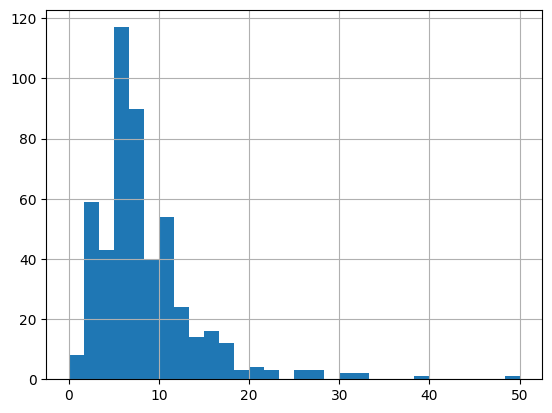

In [11]:
lovely_bones_correlations_df['users_who_rated_both_books'].hist(bins=30);

The x-axis of the histogram represents the number of users who have rated both "The Lovely Bones" and a given book. For instance, if 32 users have rated both "The Lovely Bones" and "Jurassic Park," there will be a mark at the value 32 on the x-axis. Similarly, if only 2 users have rated both "The Lovely Bones" and "Practical Statistics for Data Scientists," there will be a mark at the value 2 on the x-axis.

The y-axis represents the frequency or count of books. It indicates how many books have been rated alongside "The Lovely Bones" a certain number of times. For example, if there are 10 books that have been rated by 2 users alongside "The Lovely Bones," there would be a bar of height 10 at the value 2 on the x-axis.

The histogram reveals that many books have been rated less than 10 times by people who also rated "The Lovely Bones" . To ensure customer satisfaction by avoiding misleading recommendations based on insufficient data, we will remove any books where less than 10 users have rated both books. This approach ensures that our recommendations are based on a more substantial user base and are less likely to include books that are not widely appreciated.

In [12]:
lovely_bones_correlations_df = lovely_bones_correlations_df[lovely_bones_correlations_df["users_who_rated_both_books"] > 10]

Let's add the book titles and authors to see what our results are

In [13]:
book_info_columns = ['book_isbn', 'book_title', 'book_author']

lovely_bones_top_10_correlation = (lovely_bones_correlations_df
                                  .head(10)
                                  .reset_index()
                                  .merge(df.drop_duplicates(subset='book_isbn'),
                                         on='book_isbn',
                                         how='left')
                                  [book_info_columns + ['lovely_bones_correlation',	'users_who_rated_both_books']]
                                  )
lovely_bones_top_10_correlation

,book_isbn,book_title,book_author,lovely_bones_correlation,users_who_rated_both_books
0,0316096199,Lucky : A Memoir,Alice Sebold,0.096583,32
1,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,0.070377,39
2,0446531332,Nights in Rodanthe,Nicholas Sparks,0.069124,17
3,0743418174,Good in Bed,Jennifer Weiner,0.059136,33
4,0385265700,The Book of Ruth (Oprah's Book Club (Paperback)),Jane Hamilton,0.059117,21
5,0375412824,The Dive From Clausen's Pier (Alex Awards),ANN PACKER,0.057938,12
6,0385504209,The Da Vinci Code,Dan Brown,0.056775,50
7,0316969443,Suzanne's Diary for Nicholas,James Patterson,0.055334,15
8,0671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,0.050213,25
9,031242227X,Running with Scissors: A Memoir,Augusten Burroughs,0.049664,12


Looks like the best recommendation for people who liked The Lovely Bones is another book by Alice Sebold

In [14]:
df.loc[lovely_bones_author_mask, book_info_columns].drop_duplicates()

,book_isbn,book_title,book_author
3796,0316096199,Lucky : A Memoir,Alice Sebold
4254,0316666343,The Lovely Bones: A Novel,Alice Sebold


###3.2.&nbsp;Cosine similarity correlation matrix
Cosine similarity determines the similarity between two vectors in a multi-dimensional space. It quantifies the cosine of the angle between the vectors, providing a value between -1 and 1.

Unlike the Pearson correlation coefficient, which measures the linear relationship between two sets of data, cosine similarity focuses on the direction rather than the magnitude of the vectors. A cosine similarity value of 1 indicates that the vectors are perfectly aligned, while a value of -1 suggests they are completely opposite in orientation. A value of 0 implies no similarity between the vectors.

In the context of data analysis using pandas, cosine similarity is not calculated directly through a specific method like the `.corr()` method for Pearson correlation. Instead, it is commonly computed using mathematical formulas or specific libraries, here we use our old friend SKLearn.

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

books_cosines_matrix = pd.DataFrame(cosine_similarity(user_book_matrix.T),
                                    columns=user_book_matrix.columns,
                                    index=user_book_matrix.columns)
books_cosines_matrix

book_isbn,002542730X,0060096195,006016848X,0060173289,0060175400,0060199652,0060391626,0060392452,0060502258,0060915544,...,1558745157,1559029838,1573225517,1573225789,1573227331,1573229326,1573229571,1592400876,1844262553,1878424319
book_isbn,,,,,,,,,,,,,,,,,,,,,
002542730X,1.000000,0.000000,0.014222,0.000000,0.024904,0.013124,0.011569,0.025633,0.014141,0.028294,...,0.023633,0.013015,0.029431,0.030372,0.039190,0.038208,0.026314,0.026203,0.011120,0.000000
0060096195,0.000000,1.000000,0.000000,0.000000,0.015929,0.000000,0.000000,0.022010,0.000000,0.012913,...,0.000000,0.040698,0.000000,0.011182,0.000000,0.000000,0.000000,0.027342,0.000000,0.000000
006016848X,0.014222,0.000000,1.000000,0.000000,0.022034,0.025546,0.035030,0.022902,0.042816,0.000000,...,0.034368,0.025333,0.000000,0.020623,0.014670,0.016614,0.046645,0.023341,0.021644,0.033698
0060173289,0.000000,0.000000,0.000000,1.000000,0.055618,0.059895,0.000000,0.023828,0.027785,0.000000,...,0.018991,0.000000,0.000000,0.014403,0.000000,0.008288,0.021900,0.000000,0.000000,0.000000
0060175400,0.024904,0.015929,0.022034,0.055618,1.000000,0.095362,0.017924,0.036457,0.016753,0.027438,...,0.018938,0.040327,0.000000,0.016415,0.011676,0.013224,0.018345,0.018578,0.017227,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573229326,0.038208,0.000000,0.016614,0.008288,0.013224,0.015332,0.013515,0.016690,0.017769,0.000000,...,0.014280,0.015204,0.085370,0.029705,0.134831,1.000000,0.109393,0.030018,0.012990,0.000000
1573229571,0.026314,0.000000,0.046645,0.021900,0.018345,0.017724,0.015624,0.031779,0.008987,0.002833,...,0.031601,0.017576,0.021901,0.014308,0.062813,0.109393,1.000000,0.028532,0.015017,0.000000
1592400876,0.026203,0.027342,0.023341,0.000000,0.018578,0.021539,0.032277,0.046281,0.038224,0.000000,...,0.020061,0.021359,0.020445,0.049073,0.012368,0.030018,0.028532,1.000000,0.018249,0.000000


####3.2.1.&nbsp;Finding books similar to the most popular book - The Lovely Bones
This process is virtually the same as we did for correlation comparison above

In [16]:
# Create a DataFrame using the values from 'books_cosines_matrix' for the 'lovely_bones_isbn' book.
lovely_bones_cosines_df = pd.DataFrame(books_cosines_matrix[lovely_bones_isbn])

# Rename the column 'lovely_bones_isbn' to 'lovely_bones_cosine'
lovely_bones_cosines_df = lovely_bones_cosines_df.rename(columns={lovely_bones_isbn: 'lovely_bones_cosine'})

# Remove the row with the index 'lovely_bones_isbn'
lovely_bones_cosines_df = lovely_bones_cosines_df[lovely_bones_cosines_df.index != lovely_bones_isbn]

# Sort the 'lovely_bones_cosines_df' by the column 'lovely_bones_cosine' column in descending order.
lovely_bones_cosines_df = lovely_bones_cosines_df.sort_values(by="lovely_bones_cosine", ascending=False)

# Find out the number of users rated both The Lovely Bones and the other book
no_of_users_rated_both_books = [sum((user_book_matrix[lovely_bones_isbn] > 0) & (user_book_matrix[isbn] > 0)) for isbn in lovely_bones_cosines_df.index]

# Create a column for the number of users who rated The Lovely Bones and the other book
lovely_bones_cosines_df['users_who_rated_both_books'] = no_of_users_rated_both_books

# Remove recommendations that have less than 10 users who rated both books.
lovely_bones_cosines_df = lovely_bones_cosines_df[lovely_bones_cosines_df["users_who_rated_both_books"] > 10]

# Display the first 10 rows of the 'lovely_bones_cosines_df' DataFrame.
lovely_bones_cosines_df.head(10)

,lovely_bones_cosine,users_who_rated_both_books
book_isbn,,
0316096199,0.109223,32
0446672211,0.090402,39
0385504209,0.082953,50
0446531332,0.077927,17
0743418174,0.077261,33
0385265700,0.071308,21
0316601950,0.067626,26
0671021001,0.067531,25
0156027321,0.067222,28


Add the titles and authors to the top 10

In [17]:
lovely_bones_top_10_cosine = (lovely_bones_cosines_df
                              .head(10)
                              .reset_index()
                              .merge(df.drop_duplicates(subset='book_isbn'),
                                     on='book_isbn',
                                     how='left')
                              [book_info_columns + ['lovely_bones_cosine',	'users_who_rated_both_books']]
                              )
lovely_bones_top_10_cosine

,book_isbn,book_title,book_author,lovely_bones_cosine,users_who_rated_both_books
0,0316096199,Lucky : A Memoir,Alice Sebold,0.109223,32
1,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,0.090402,39
2,0385504209,The Da Vinci Code,Dan Brown,0.082953,50
3,0446531332,Nights in Rodanthe,Nicholas Sparks,0.077927,17
4,0743418174,Good in Bed,Jennifer Weiner,0.077261,33
5,0385265700,The Book of Ruth (Oprah's Book Club (Paperback)),Jane Hamilton,0.071308,21
6,0316601950,The Pilot's Wife : A Novel,Anita Shreve,0.067626,26
7,0671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,0.067531,25
8,0156027321,Life of Pi,Yann Martel,0.067222,28
9,0142001740,The Secret Life of Bees,Sue Monk Kidd,0.066890,31


---
##4.&nbsp;Challenge: build a function 😃
Make a function that takes in an isbn and an integer, n. The output should be the top n recommendations for the inputted isbn. Use the cosine similarity as your comparison rating.

In [18]:
# Generate ideas, you're a coding rockstar!